Part 2 Question 1
Group Id: ViDiSh 
Group Members : Divya Mishra, Shreyansh Aswal, Vipin Gautam

In [129]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt

In [130]:
Y_total=3
D_total=784
filename="C:\\Users\\user\\Desktop\\Book2.csv"
Y=[]
X=[]

In [131]:
def load_csv_file():
    df=pd.read_csv(filename)
    for index,row in df.iterrows():
        Y.append(row[784])
        X.append(row[0:784])

In [132]:
def convert_pixels():
    for i in range(len(X)):
        for j in range(D_total):
            #Classifying each pixel as either 0 or 1 depending on the condition below
            if X[i][j]>127 and X[i][j]<=255:
                X[i][j]=1
            else:
                X[i][j]=0

[0.33048743 0.33133472 0.33817784]
[0.3957658  0.44759071 0.1566435 ]
[0.39198895 0.35405692 0.25395413]
[0.3445612  0.38780258 0.26763622]
[0.29842252 0.40489817 0.29667931]
[0.27572523 0.41605416 0.3082206 ]
[0.26270122 0.41872219 0.31857659]
[0.26154372 0.41387995 0.32457633]
[0.26469521 0.40794535 0.32735943]
[0.27189883 0.39982129 0.32827988]
[0.27717924 0.39175345 0.33106731]
[0.28557949 0.38052835 0.33389216]
[0.28884464 0.37621849 0.33493686]
[0.29238736 0.37149881 0.33611383]
[0.29428476 0.36951327 0.33620197]
[0.29519084 0.36860025 0.33620891]
[0.29392602 0.36843569 0.33763829]
[0.29377894 0.36856755 0.33765351]
[0.2936676  0.36867813 0.33765428]
[0.2950179 0.3673216 0.3376605]
[0.29778595 0.36319698 0.33901707]
[0.29793378 0.36290855 0.33915767]
[0.29811164 0.36271467 0.3391737 ]
[0.29876    0.36205928 0.33918072]
[0.30069364 0.36011421 0.33919215]
[0.29997786 0.36082101 0.33920113]
[0.2991499  0.36165354 0.33919656]
[0.29904776 0.36149287 0.33945937]
[0.29803006 0.3613267  

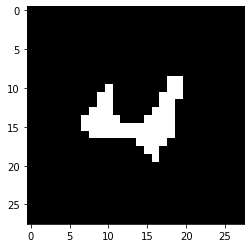

In [133]:
load_csv_file()
convert_pixels()
X=np.array(X)

# pie is a K sized vector, where K=number of labels(here 3)
pie=np.random.uniform(.30,.50,Y_total)
pie=pie/(np.sum(pie))

#p_i is a K*D array, where K=number of labels and D=number of features in an image(here 784)
p_i=np.zeros(Y_total*D_total).reshape(Y_total,D_total)
print(pie)

#randomly initializing p_i
for i in range(Y_total):
    for j in range(D_total):
        p_i[i][j]=np.random.uniform(0.25,0.70)

number_of_iterations=30
for l in range(number_of_iterations):
    
    #E step  
    # gamma_i is the responsiblilty matrix, of dimensions N*K(N is the number of images)
    gamma_i=np.ones(Y_total*len(X)).reshape(len(X),Y_total)
    for i in range(len(X)):
        for k in range(Y_total):
            for j in range(D_total):
                gamma_i[i][k]*=(p_i[k][j]**X[i][j])*((1-p_i[k][j])**(1-X[i][j]))
    
    gamma_i = gamma_i*pie
   
    for i in range(len(gamma_i)):
        gamma_i[i]/=np.sum(gamma_i[i])

    #M step
    p_i=np.zeros(Y_total*D_total).reshape(Y_total,D_total)
    for i in range(len(X)):
        for k in range(Y_total):
            p_i[k]+=X[i]*gamma_i[i][k]

    gamma_i_sum = np.sum(gamma_i, axis=0)

    for k in range(Y_total):
        p_i[k]/=gamma_i_sum[k]
    
    pie=gamma_i_sum/len(X)
    #Here we are printing the updated value of the prior array at each iteration to visualize how it converges to a value
    print(pie)

img_4=np.zeros(D_total)

for i in range(len(p_i[2])):
    #Assigning pixel values based on the mean of each feature calculated for the label 4
    if np.random.uniform() <=p_i[2][i]:
        img_4[i]=1
    else:
        img_4[i]=0

img_4=img_4.reshape(28,28)
plt.imshow(img_4, cmap="gray")   

Here we have displayed the digit 4 using the array p_i which basically gives the average bias of each of the 784 features for the label 4. Similarly, plots for labels 2 and 3 can also be obtained. As we can see, the label is estimated fairly well.

In [134]:
count=0
'''To calculate accuracy,we can directly use the responsibility matrix gamma_i as each entry represents the probability
of a point belonging to either of the 3 clusters. If we had more number of labels, we could have used an array f
of size=number of features. However, for 3 labels, the below code looks more intuitive as clear comaprisons are being made between 3 values'''
for i in range(len(X)):
    f2=gamma_i[i][0]
    f3=gamma_i[i][1]
    f4=gamma_i[i][2]
    if f2>f3:
        if f2>f4:
            Y_predicted=2
        else:
            Y_predicted=4
    else:
        if f3>f4:
            Y_predicted=3
        else:
            Y_predicted=4
    #List Y consists of the actual labels
    if Y_predicted==Y[i]:
        count+=1
#Accuracy is the number of correct predictions divided by the number of total predictions
print(count/len(X))

0.8285714285714286


Thus, the accuracy after 30 iterations was nearly 82 percent. However, this varied depending on the initial value of p_i array, which gets initialized randomly in the beginning.